# Conteo de eventos en torres cercanas a la línea 6 del metro

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import numpy as np
import glob
from shapely import wkt

### Se lee la información del día de prueba de CDR

In [2]:
archivos_csv = glob.glob('/home/jsepulveda/testday/*.csv.gz')
lista = []
for archivo in archivos_csv:
    datos = pd.read_csv(archivo)
    lista.append(datos)


### Se concatenan los dataframes de los usuarios para generar solo un dataframe

In [21]:
usuarios = pd.concat(lista, ignore_index = True)
usuarios.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo
0,171010,193239,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
1,171010,195241,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
2,171010,201242,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
3,171010,203242,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D
4,171010,205244,0,37a49038d6b3079a14a9876bade5c763be97bb0a028f57...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DEFLTE,DEFLT,E,D


## Conteo de eventos para torres a 500 metros de la Línea 6 del Metro

### Se carga la información con las torres cercanas a menos de 500 metros

In [22]:
torres_500 = pd.read_csv('/home/jsepulveda/torres_cercanas_500.csv')
torres_500['geometry'] = torres_500['geometry'].apply(wkt.loads)
torres_500_gdf = gpd.GeoDataFrame(torres_500, crs='epsg:4326')
torres_500_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,CAMCH,POINT (-70.60911 -33.41897),PROVIDENCIA
2,CCA1A,POINT (-70.60588 -33.41796),PROVIDENCIA
3,CCA1B,POINT (-70.60588 -33.41796),PROVIDENCIA
4,CCA1C,POINT (-70.60588 -33.41796),PROVIDENCIA


### Se intercectan los dataframes para contar las conexiones utilzando el nombre de la torre como intersección

In [23]:
data = usuarios.merge(torres_500_gdf, how = 'inner', on = 'rinhead')
data.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
1,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
2,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
3,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
4,171010,101316,275,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA


### Se realiza el conteo de los dispositivos que se conectaron a estas torres

In [24]:
usuarios_por_torre = data.groupby(['rinhead']).agg({'numa':'nunique'}).reset_index()
usuarios_por_torre.head()

,rinhead,numa
0,11SEP,4748
1,AALIR,40
2,AGSTF,2468
3,AHMF2,9555
4,BAHF2,4677


## Conteo de eventos para torres a 1000 metros de la Línea 6 del Metro

### Se carga la información con las torres cercanas a menos de 1000 metros

In [25]:
torres_1000 = pd.read_csv('/home/jsepulveda/torres_cercanas_1000.csv')
torres_1000['geometry'] = torres_1000['geometry'].apply(wkt.loads)
torres_1000_gdf = gpd.GeoDataFrame(torres_1000, crs='epsg:4326')
torres_1000_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,ATICF,POINT (-70.60563 -33.42468),PROVIDENCIA
2,BARRO,POINT (-70.61785 -33.43059),PROVIDENCIA
3,BELET,POINT (-70.61900 -33.42553),PROVIDENCIA
4,CAMCH,POINT (-70.60911 -33.41897),PROVIDENCIA


### Se intercectan los dataframes para contar las conexiones utilzando el nombre de la torre como intersección

In [26]:
data = usuarios.merge(torres_1000_gdf, how = 'inner', on = 'rinhead')
data.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
1,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
2,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
3,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
4,171010,101316,275,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA


### Se realiza el conteo de los dispositivos que se conectaron a estas torres

In [27]:
usuarios_por_torre = data.groupby(['rinhead']).agg({'numa':'nunique'}).reset_index()
usuarios_por_torre.head()

,rinhead,numa
0,11SEP,4748
1,AALIR,40
2,AGSTF,2468
3,AHMF2,9555
4,AJINE,7381


## Conteo de eventos para torres a 1500 metros de la Línea 6 del Metro


### Se carga la información con las torres cercanas a menos de 1500 metros

In [28]:
torres_1500 = pd.read_csv('/home/jsepulveda/torres_cercanas_1500.csv')
torres_1500['geometry'] = torres_1500['geometry'].apply(wkt.loads)
torres_1500_gdf = gpd.GeoDataFrame(torres_1500, crs='epsg:4326')
torres_1500_gdf.head()

,rinhead,geometry,NOM_COMUNA
0,11SEP,POINT (-70.61111 -33.42227),PROVIDENCIA
1,ATICF,POINT (-70.60563 -33.42468),PROVIDENCIA
2,BARRO,POINT (-70.61785 -33.43059),PROVIDENCIA
3,BELET,POINT (-70.61900 -33.42553),PROVIDENCIA
4,BUSIS,POINT (-70.62233 -33.42679),PROVIDENCIA


### Se intercectan los dataframes para contar las conexiones utilzando el nombre de la torre como intersección

In [29]:
data = usuarios.merge(torres_1500_gdf, how = 'inner', on = 'rinhead')
data.head()

,fecha,hora,dur,numa,numb,rin,rinhead,rintail,tipo,geometry,NOM_COMUNA
0,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
1,171010,91316,422,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
2,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
3,171010,94316,371,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U9,DPTC2,U9,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA
4,171010,101316,275,44781ba848d16e65c5fd27547c134af49494b331510fd0...,201d1ad4fde8bea379ee304ff6643cfabba99634569f67...,DPTC2U3,DPTC2,U3,D,POINT (-70.65995 -33.47791),PEDRO AGUIRRE CERDA


### Se realiza el conteo de los dispositivos que se conectaron a estas torres

In [30]:
usuarios_por_torre = data.groupby(['rinhead']).agg({'numa':'nunique'}).reset_index()
usuarios_por_torre.head()

,rinhead,numa
0,11SEP,4748
1,AALIR,40
2,AAMAC,49
3,AGSTF,2468
4,AGUAF,9489


# ##################################################################

### Definiendo las densidades de POIS mediante KDE

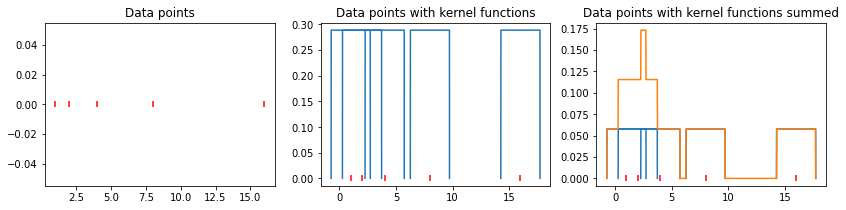

In [2]:
from KDEpy import TreeKDE
import numpy as np
np.random.seed(123)
data = [1, 2, 4, 8, 16]

# Plot the points
plt.figure(figsize=(14, 3)); plt.subplot(1, 3, 1)
plt.title('Data points')
plt.scatter(data, np.zeros_like(data), marker='|', c='r', label='Data')

# Plot a kernel on each data point
plt.subplot(1, 3, 2); plt.title('Data points with kernel functions')
plt.scatter(data, np.zeros_like(data), marker='|', c='r', label='Data')
for d in data:
    x, y = TreeKDE(kernel='box').fit([d])()
    plt.plot(x, y, color='#1f77b4')

# Plot a normalized kernel on each data point, and the sum
plt.subplot(1, 3, 3); plt.title('Data points with kernel functions summed')
plt.scatter(data, np.zeros_like(data), marker='|', c='r', label='Data')
for d in data:
    x, y = TreeKDE(kernel='box').fit([d])()
    plt.plot(x, y / len(data), color='#1f77b4')
x, y = TreeKDE(kernel='box').fit(data)()
plt.plot(x, y, color='#ff7f0e');

In [3]:
recreacion_pois = pd.read_csv('/home/jsepulveda/files/recreacion_pois.csv')
recreacion_pois['geometry'] = recreacion_pois['geometry'].apply(wkt.loads)
recreacion_gdf = gpd.GeoDataFrame(recreacion_pois, crs='epsg:4326')
coord_list_r = [(x,y) for x,y in zip(recreacion_gdf['geometry'].x, recreacion_gdf['geometry'].y)]

In [4]:
educacion_pois = pd.read_csv('/home/jsepulveda/files/educacion_pois.csv')
educacion_pois['geometry'] = educacion_pois['geometry'].apply(wkt.loads)
educacion_gdf = gpd.GeoDataFrame(educacion_pois, crs='epsg:4326')
coord_list_e = [[x,y] for x,y in zip(educacion_gdf['geometry'].x, educacion_gdf['geometry'].y)]

Locator attempting to generate 4168 ticks ([0.0, ..., 0.16668000000000002]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4168 ticks ([0.0, ..., 0.16668000000000002]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4246 ticks ([0.0, ..., 0.10612500000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4246 ticks ([0.0, ..., 0.10612500000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4168 ticks ([0.0, ..., 0.08334000000000001]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4168 ticks ([0.0, ..., 0.08334000000000001]), which exceeds Locator.MAXTICKS (1000).


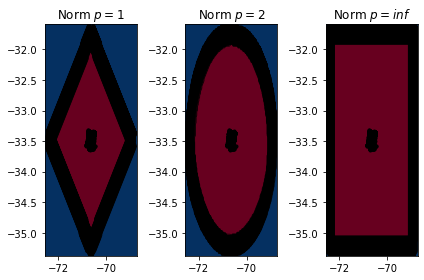

In [105]:
from KDEpy import FFTKDE

# Create 2D data of shape (obs, dims)
data = np.array(coord_list_r)

grid_points = 2**7  # Grid points in each dimension
N = 16  # Number of contours

fig = plt.figure()

for plt_num, norm in enumerate([1, 2, np.inf], 1):

    ax = fig.add_subplot(1, 3, plt_num)
    ax.set_title(f'Norm $p={norm}$')

    # Compute the kernel density estimate
    kde = FFTKDE(kernel='box', norm=norm)
    grid, points = kde.fit(data).evaluate(grid_points)

    # The grid is of shape (obs, dims), points are of shape (obs, 1)
    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
    z = points.reshape(grid_points, grid_points).T

    # Plot the kernel density estimate
    ax.contour(x, y, z, N, linewidths=0.8, colors='k')
    ax.contourf(x, y, z, N, cmap="RdBu_r")
    ax.plot(data[:, 0], data[:, 1], 'ok', ms=3)

plt.tight_layout()

In [102]:
urban_distritos = gpd.read_file('/home/jsepulveda/urban_distritos.shp')

128

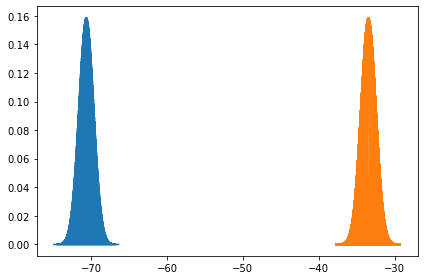

In [107]:
from KDEpy import FFTKDE
data = np.array(coord_list_r)

# Notice how bw (standard deviation), kernel, weights and grid points are set
x, y = FFTKDE(bw=1, kernel='gaussian').fit(data, weights=None).evaluate(2**8)

plt.plot(x, y); plt.tight_layout()